# Population

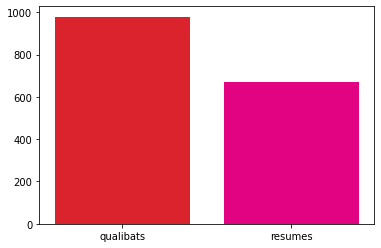

In [1]:
from clustering import *
filesDict = loadFiles()
names = [label for label in filesDict]
values = [len(filesDict[label]) for label in filesDict]
colors = [(np.random.random(), np.random.random(), np.random.random()) for label in filesDict]

plt.bar(names, values, color=colors)
plt.savefig('./saves/bar.png')

# Wordcloud

In [33]:
processer = Processer()

Processer initialization complete
Extract text from ../documents\qualibats\maisons-martin-3756.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\maisons-martin-3756.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 1.3339893817901611
Extract text from ../documents\qualibats\sofib-sas-569.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\sofib-sas-569.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.43483901023864746
Extract text from ../documents\qualibats\abadie-chauffage-sarl--2927.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\abadie-chauffage-sarl--2927.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.6068234443664551
Extract text from ../documents\qualibats\atole-sa-3376.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\atole-sa-3376.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.12333130836486816
Extract text from ../documents\qualibats\entreprise-de-travaux-et-de-ravalement-e-t-r--5752.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\entreprise-de-travaux-et-de-ravalement-e-t-r--5752.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.21681737899780273
Extract text from ../documents\qualibats\e-m-f-fayolle-2372.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\e-m-f-fayolle-2372.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.16138982772827148
Extract text from ../documents\qualibats\floreal-2368.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\floreal-2368.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.48328328132629395
Extract text from ../documents\qualibats\minaire-menuiseries-11.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\minaire-menuiseries-11.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.4567697048187256
Extract text from ../documents\qualibats\cassin-travaux-publics-voirie-batiment-et-terrassement-cassin-tp--5740.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\cassin-travaux-publics-voirie-batiment-et-terrassement-cassin-tp--5740.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.37506842613220215
Extract text from ../documents\qualibats\matt-pascal-584.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\matt-pascal-584.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.22717809677124023
Extract text from ../documents\qualibats\steiner-wey-889.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\steiner-wey-889.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.20234441757202148
Extract text from ../documents\qualibats\claude-m-btp-sa-1738.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\claude-m-btp-sa-1738.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.12994384765625
Extract text from ../documents\qualibats\entreprise-andre-anthaner-3534.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\entreprise-andre-anthaner-3534.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.1421823501586914
Extract text from ../documents\qualibats\jlv-aluminium-verre-structure-2382.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\jlv-aluminium-verre-structure-2382.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.2347567081451416
Extract text from ../documents\qualibats\marconnet-et-fils-sarl-4366.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\marconnet-et-fils-sarl-4366.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.1848149299621582
Extract text from ../documents\qualibats\fencl-chauffage-sas-378.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\fencl-chauffage-sas-378.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.20100140571594238
Extract text from ../documents\qualibats\nisse-freres-et-cie-601.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\nisse-freres-et-cie-601.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.2346787452697754
Extract text from ../documents\qualibats\hoffmann-remiatte-443.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\hoffmann-remiatte-443.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.15493202209472656
Extract text from ../documents\qualibats\cristal-facades-sas-3385.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\cristal-facades-sas-3385.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.2019646167755127
Extract text from ../documents\qualibats\cutillas-manuel-sarl-3800.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\cutillas-manuel-sarl-3800.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.15346431732177734
Extract text from ../documents\qualibats\alu-perpignan-3461.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\alu-perpignan-3461.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.1308732032775879
Extract text from ../documents\qualibats\charpentiers-couvreurs-de-gascogne-5572.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\charpentiers-couvreurs-de-gascogne-5572.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.21610236167907715
Extract text from ../documents\qualibats\bourrel-gilles-construction-eurl-3975.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\bourrel-gilles-construction-eurl-3975.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.33513379096984863
Extract text from ../documents\qualibats\solotoit-950.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\solotoit-950.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.2327287197113037
Extract text from ../documents\qualibats\durand-et-fils-3468.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\durand-et-fils-3468.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.19139838218688965
Extract text from ../documents\qualibats\ecoba-2010.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\ecoba-2010.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.48314952850341797
Extract text from ../documents\qualibats\bessiere-serrurerie-5055.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\bessiere-serrurerie-5055.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.15755915641784668
Extract text from ../documents\qualibats\s-n-b--2121.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\s-n-b--2121.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.14613866806030273
Extract text from ../documents\qualibats\leclerc-5496.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\leclerc-5496.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.14454102516174316
Extract text from ../documents\qualibats\technicfer-sarl-3356.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\technicfer-sarl-3356.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.1701803207397461
Extract text from ../documents\qualibats\marly-toitures-869.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\marly-toitures-869.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.2889671325683594
Extract text from ../documents\qualibats\delmas-serrurerie-2803.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\delmas-serrurerie-2803.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.18861770629882812
Extract text from ../documents\qualibats\lerouxel-couverture-sarl-5130.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\lerouxel-couverture-sarl-5130.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.19423937797546387
Extract text from ../documents\qualibats\louriac-robert-etablissements-3271.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\louriac-robert-etablissements-3271.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.2095489501953125
Extract text from ../documents\qualibats\flucklinger-r-societe--214.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\flucklinger-r-societe--214.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.14638829231262207
Extract text from ../documents\qualibats\triola-sarl-4571.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\triola-sarl-4571.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.20561885833740234
Extract text from ../documents\qualibats\andolfatto-fils-sarl-1907.pdf
Could not load the PDF ...
	tokenize computed in 0.0010578632354736328
Extract text from ../documents\qualibats\decker-sarl-377.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\decker-sarl-377.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.1831037998199463
Extract text from ../documents\qualibats\pastro-freres-367.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\pastro-freres-367.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.12021446228027344
Extract text from ../documents\qualibats\le-chauffage-lorrain-411.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\le-chauffage-lorrain-411.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.1877429485321045
Extract text from ../documents\qualibats\thivolle-freres-1452.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\thivolle-freres-1452.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.15853619575500488
Extract text from ../documents\qualibats\largier-technologie-1620.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\largier-technologie-1620.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.19022727012634277
Extract text from ../documents\qualibats\schaeffer-cie-60.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\schaeffer-cie-60.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.1604452133178711
Extract text from ../documents\qualibats\dauphine-isolation-projection-2027.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\dauphine-isolation-projection-2027.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.7397396564483643
Extract text from ../documents\qualibats\toitures-magnani-61.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\toitures-magnani-61.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 1.0700452327728271
Extract text from ../documents\qualibats\sarl-res-5715.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\sarl-res-5715.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.7693333625793457
Extract text from ../documents\qualibats\segura-construction-s-a-s-4137.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\segura-construction-s-a-s-4137.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.16409015655517578
Extract text from ../documents\qualibats\berniere-sas-3951.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\berniere-sas-3951.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.18553733825683594
Extract text from ../documents\qualibats\gerard-ayglon-et-compagnie-1528.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\gerard-ayglon-et-compagnie-1528.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.17157912254333496
Extract text from ../documents\qualibats\ginoux-fils-entreprise-miroiterie-vitrerie-1933.pdf


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\pdfminer\pdfpage.py:159: PDFTextExtractionNotAllowedWarning: The PDF <_io.BufferedReader name='../documents\\qualibats\\ginoux-fils-entreprise-miroiterie-vitrerie-1933.pdf'> contains a metadata field indicating that it should not allow text extraction. Ignoring this field and proceeding.
  warnings.warn(warning_msg, PDFTextExtractionNotAllowedWarning)


	tokenize computed in 0.42938852310180664
Extract text from ../documents\resumes\fanta-d1115c66ff3e88289caacd8a.pdf
	tokenize computed in 0.7333316802978516
Extract text from ../documents\resumes\fanta-5276c592f5ac49435924f3e4.pdf
	tokenize computed in 0.6698398590087891
Extract text from ../documents\resumes\fanta-7056598cdd49b4a5ff8b2cad.pdf
	tokenize computed in 0.4369790554046631
Extract text from ../documents\resumes\fanta-4f8ee320c369fe92f8959ddf.pdf
	tokenize computed in 0.7555356025695801
Extract text from ../documents\resumes\fanta-57b42e0cdd9987940546374c.pdf
	tokenize computed in 1.1860058307647705
Extract text from ../documents\resumes\fanta-ab3711ef0b3564af7ebd85fe.pdf
	tokenize computed in 1.861853837966919
Extract text from ../documents\resumes\fanta-96fe3044b8232189ade0e5ec.pdf
	tokenize computed in 1.3913664817810059
Extract text from ../documents\resumes\fanta-977e2e021ce739a4cc6cb87a.pdf
	tokenize computed in 0.37577271461486816
Extract text from ../documents\resumes

In [ ]:
sample_corpus = [processer.tokenize(extractFullText(file)) for label in filesDict for file in np.random.choice(filesDict[label], min(50, len(filesDict[label])))]

array([9, 4])

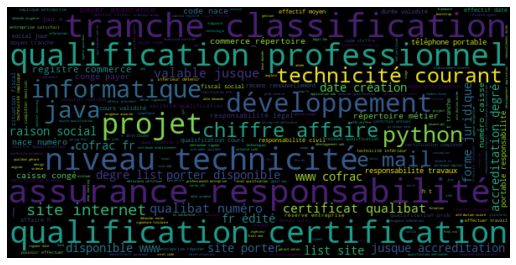

In [37]:
from wordcloud import WordCloud
def generateWC(text: str, stopwords = []) -> WordCloud:

    wordcloud = WordCloud(random_state = 42,
        normalize_plurals=False,
        width=600, height=300,
        max_words=300,
        stopwords=stopwords
    )

    wordcloud.generate(text)

    return wordcloud
def displayWC(wordcloud: WordCloud) -> None:
    fig, ax = plt.subplots(1, 1, figsize=(9,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('./saves/wordcloud.png')

displayWC(generateWC(' '.join([token for tokens in sample_corpus for token in tokens])))    

# Word2Vec Visualization

In [3]:
doc2vec = Model('./saves/gensim.model')
doc2vec.load()

Model loaded from ./saves/gensim.model


In [38]:

vectors = np.asarray(doc2vec.model.wv.vectors)
labels = np.asarray(doc2vec.model.wv.index_to_key)
x_vals, y_vals, labels = reduce_dimensions(vectors)

Model loaded from ./saves/gensim.model


C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


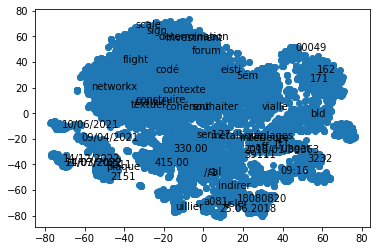

In [39]:
fig, ax = plt.subplots()
ax.scatter(x_vals, y_vals)
for i in np.random.choice(np.arange(len(vectors)), 50):
    plt.annotate(labels[i], (x_vals[i], y_vals[i]))
plt.savefig('./saves/wordmap.png')

In [11]:
pick = np.random.choice(doc2vec.model.wv.index_to_key, 20)
pairs = [(pick[2*i], pick[2*i+1]) for i in range(10)]
for w1, w2 in pairs:
    print(f'{w1} - {w2} : {doc2vec.model.wv.similarity(w1, w2)}')

now - taxe : 0.18031175434589386
naturel - ping : 0.16515889763832092
l2017376 - line : 0.06638658791780472
perception - économétrique : 0.33359038829803467
confluence - saleille : 0.16979938745498657
debian - fusion : 0.3363264203071594
zénith - facturation : 0.24668526649475098
plomb - debian : 0.18473407626152039
complétude - donnee : 0.41682949662208557
body - usager : -0.04219615086913109


# SVM Visualization

Clf performed on reduced data

In [2]:
dataStorage = Data('./saves/dataframe.csv')
dataStorage.load()

embeddings = [[float(v.strip('\n\r')) for v in vector.strip(' []').split(' ') if v!=''] for vector in dataStorage.df['embedding']]
labels = dataStorage.df['label']

x_vals, y_vals = reduce_dimensions(embeddings)
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
X_train, X_test, y_train, y_test = train_test_split([[x_vals[i], y_vals[i]] for i in range(len(x_vals))], labels, test_size=0.33, random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Baptiste\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


0.9858965748824715

In [5]:
# create a mesh to plot in
X_test = np.asarray(X_test)
h=.5
x_min, x_max = min(X_test[:, 0]) - 1, max(X_test[:, 0]) + 1
y_min, y_max = min(X_test[:, 1]) - 1, max(X_test[:, 1]) + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot also the training points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.savefig('./saves/svm.png')

In [1]:
import pdfExtraction
pdfExtraction.extractFullText('C:/Users/Baptiste/Documents/Fantasiapp/middleBatiuni/assets/qualibats/qualibat_1.pdf')

Extract text from C:/Users/Baptiste/Documents/Fantasiapp/middleBatiuni/assets/qualibats/qualibat_1.pdf


"CERTIFICAT QUALIBAT\n\nNUMÉRO\n\nE-E25730\n\nVALABLE JUSQU'AU\n\n30/09/2022\n\nACCREDITATION \nN°4-0523,  \nLISTE DES SITES ET \nPORTÉE DISPONIBLE \nSUR WWW.COFRAC.FR \n\nÉDITÉ LE\n\n22/06/2021\n\nSITUATION ADMINISTRATIVE ET JURIDIQUE\n\nDate de création :\n\n01/01/1934\n\nRaison sociale :\n\nTOMAT  SAS\n\nForme juridique :\n\nCapital :\n\nSAS \nDEPUIS LE 28/10/2015 \n136 480\n\nRegistre du commerce ou répertoire des métiers :\nRC STRASBOURG\nSiret :\n\n379 499 700\n\n00019\n\nCode NACE :\nNuméro caisse de congés payés :\nAssurance Responsabilité Travaux :\n\n4334Z\n\nMMA IARD 140780554\n\nAssurance Responsabilité Civile :\n\nMMA IARD 140780554\n\n78,  AVENUE DE COLMAR \n67100 STRASBOURG \n\n03 88 34 19 00\n\nTéléphone :\nPortable :\nResponsabilité légale :\n\nFax :\n\n03 88 84 42 65\n\n4027592-001\n\nTOMAT LEONARD PRÉSIDENT / TOMAT PASCAL DIRECTEUR GÉNÉRAL\n\nSituation fiscale et sociale :\n\nA  jour au 31/12/2020\n\nE-mail :\n\ntomat.sa@orange.fr\n\nSite Internet :\n\ntomat-sas.fr\n